## The Sparks Foundation : Data Science & Business Analytics Internship

## Author: SAURABH RAJ

### February, 2022.

### TASK 2 : Prediction Using Unsupervised Machine Learning

#### From given Iris dataset, to predict optimum number of clusters.

### IMPORTING THE REQUIRED LIBRARIES

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

### LOADING IRIS DATASET

In [11]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### PROPERTIES OF THE DATASET

In [12]:
iris_df.shape

(150, 4)

In [13]:
iris_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### SCATTERPLOTS

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

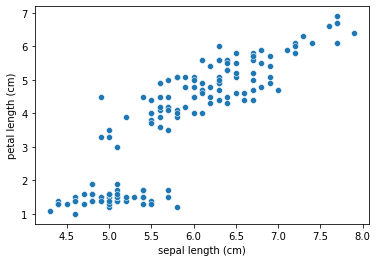

In [17]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=iris_df)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

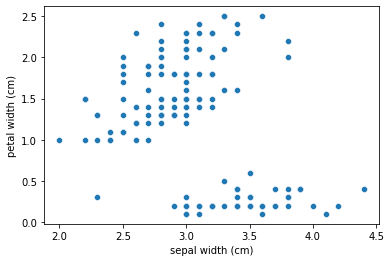

In [18]:
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=iris_df)

In [20]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

### CHOOSING THE RIGHT NO. OF CLUSTERS USING K-MEANS: 

In [21]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
# 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# max_iterint, default=300 is the Maximum number of iterations of the k-means algorithm for a single run. 
# n_initint, default=10. Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia. 
# It will initialize the centroids for clusters randomly this many times

### We can also use ELBOW method to find the optimal no. of clusters: 

C:\downloads\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\downloads\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'sse')

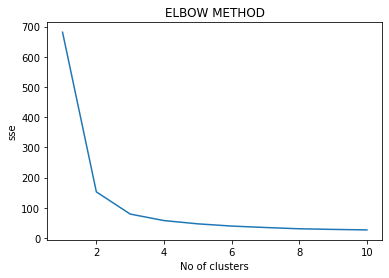

In [22]:
x = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
sse =[]
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(x)
    km.fit(x)
    sse.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse)
plt.title('ELBOW METHOD')
plt.xlabel('No of clusters')
plt.ylabel('sse') 

### From graph it is clear that elbow is formed at k=3. Therefore optimal no. of clusters is equal to 3.

### Predicting Number of Clusters using K Means Algorithm.

In [23]:
km = KMeans(n_clusters = 3)     # clustering
y_km = km.fit_predict(x)        # clustering results
print(y_km)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [24]:
km.cluster_centers_               # centroid

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualising the clusters obtained from elbow method using graph:

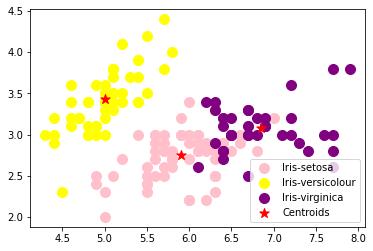

In [25]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1],                            # plotting the three clusters
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],          # plotting the centroid 
            s = 100, c = 'red',marker='*', label = 'Centroids')
plt.legend()

### SUMMARY: Therefore, for given dataset, by K means clustering method , we have predicted that the number of clusters will be three and it will represented visually by matplotlib function.